In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\MDELANEY1\OneDrive - Anglo American\Documents\Personal\Data projects\cryptocurrency historical prices\raw data\coin_Bitcoin.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [5]:
drop_columns = ['SNo', 'Name', 'Symbol', 'Date']

df = df.drop(columns=drop_columns)

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(['Close'], axis=1)
y = df['Close']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
train_data = x_train.join(y_train)

In [9]:
train_data

,High,Low,Open,Volume,Marketcap,Close
2598,9836.368969,9664.720133,9774.359936,2.371784e+10,1.802378e+11,9795.700195
1532,2635.489990,2517.590088,2572.610107,5.278560e+08,4.139708e+10,2518.439941
690,264.847992,259.161987,260.955994,1.845670e+07,3.654507e+09,261.748993
2104,3501.954135,3431.591492,3460.547124,5.422927e+09,6.108875e+10,3487.945387
2212,8200.967997,7678.781587,8196.923935,2.384340e+10,1.413157e+11,7978.309072
...,...,...,...,...,...,...
375,452.691986,440.143005,440.178009,1.034790e+07,5.730133e+09,449.460999
1832,9964.500000,9695.120117,9700.280273,7.651940e+09,1.677600e+11,9858.150391
1141,716.004028,664.487000,671.653992,2.432950e+08,1.102692e+10,704.375977
1214,580.450989,575.166992,580.179993,1.361300e+08,9.147297e+09,577.760986


array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Marketcap'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

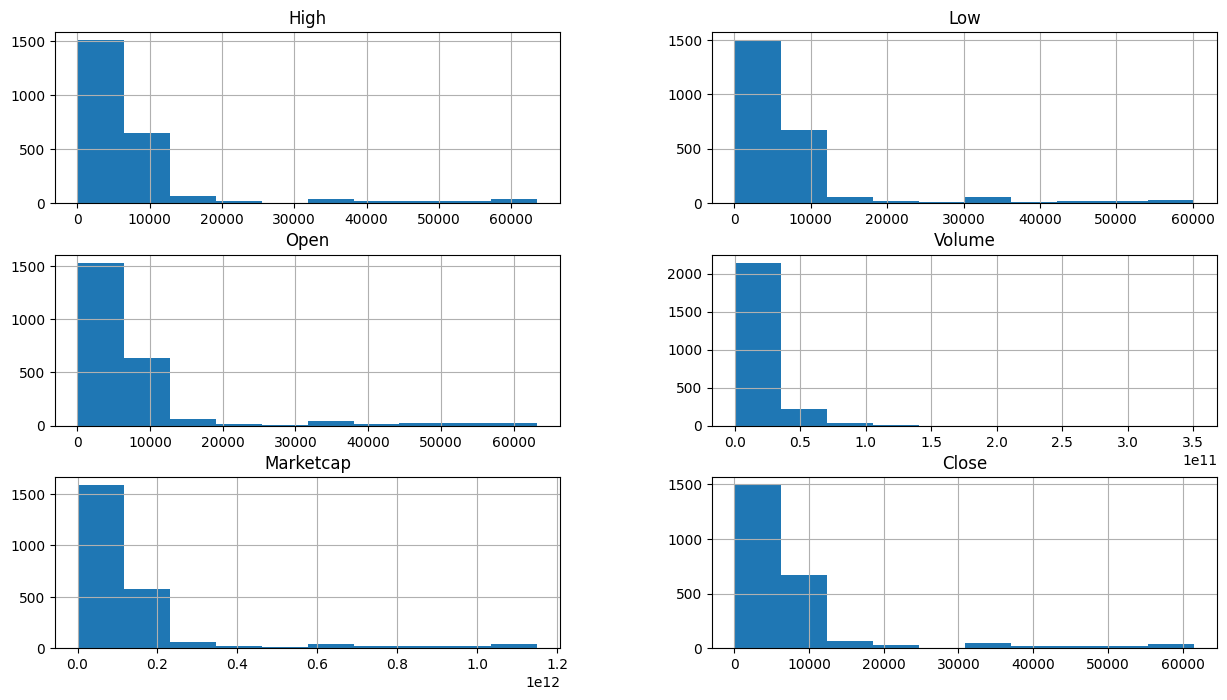

In [10]:
train_data.hist(figsize=(15, 8))

In [11]:
train_data['High'] = np.log(train_data['High'] + 1)
train_data['Low'] = np.log(train_data['Low'] + 1)
train_data['Open'] = np.log(train_data['Open'] + 1)
train_data['Volume'] = np.log(train_data['Volume'] + 1)
train_data['Marketcap'] = np.log(train_data['Marketcap'] + 1)

array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Marketcap'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

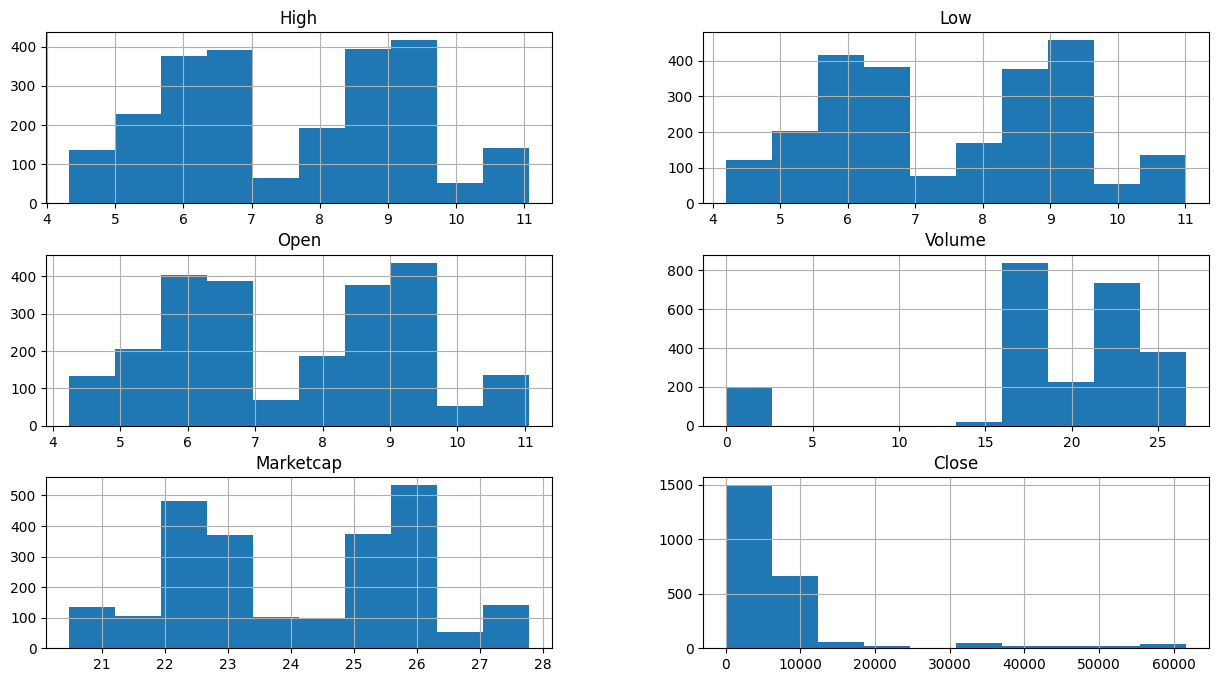

In [12]:
train_data.hist(figsize=(15, 8))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['Close'], axis= 1), train_data['Close']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [14]:
test_data = x_test.join(y_test)

test_data['High'] = np.log(test_data['High'] + 1)
test_data['Low'] = np.log(test_data['Low'] + 1)
test_data['Open'] = np.log(test_data['Open'] + 1)
test_data['Volume'] = np.log(test_data['Volume'] + 1)
test_data['Marketcap'] = np.log(test_data['Marketcap'] + 1)

In [15]:
x_test, y_test = test_data.drop(['Close'], axis= 1), test_data['Close']

In [16]:
x_test_s = scaler.transform(x_test)

In [17]:
reg.score(x_test_s, y_test)

0.5888341563664738

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [19]:
forest.score(x_test_s, y_test)

0.9994762360579992

In [20]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
best_forest = grid_search.best_estimator_

In [22]:
best_forest.score(x_test_s, y_test)

0.9994893609871214